# Chapter 15: Machine learning

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Built in datasets

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
data1 = load_boston()

C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [3]:
print(type(data1))
print(np.shape(data1.data))

<class 'sklearn.utils._bunch.Bunch'>
(506, 13)


In [4]:
df = pd.DataFrame(data1.data, columns=data1.feature_names)
df['target'] = data1.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
from sklearn.datasets import fetch_california_housing

data2 = fetch_california_housing()


df = pd.DataFrame(data2.data, columns=data2.feature_names)
df['target'] = data2.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


X
 [[ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [ 0.95008842]
 [ 1.76405235]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.40015721]
 [-0.10321885]
 [-0.15135721]]
y
 [ 77.48913677 177.41712535 147.85924209  75.22087885 139.66444108
  32.50811146 -77.37353667  31.6814481   -8.17209494 -11.98332915]


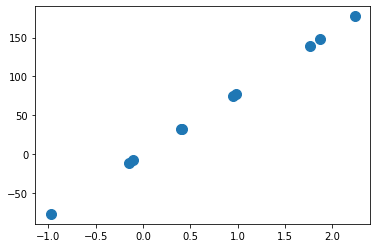

In [6]:
from sklearn.datasets import make_regression

X, y, = make_regression(n_samples=10, n_features=1, bias=0, noise=0, random_state=0)

print("X\n", X)
print("y\n", y)
plt.scatter(X, y, s=100)
plt.show()

# Regression

In [7]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) #, noise=2.5)

In [8]:
print(X_all)
print(np.shape(X_all))

print(y_all)
print(np.shape(y_all))

[[ 0.58363913  0.09599929 -0.15483832 ...  0.61219663 -0.59331801
  -0.10774061]
 [-0.37516158  0.02452215  0.85771762 ... -0.07476773 -1.53767648
   1.71561996]
 [ 0.35277058  2.42923398 -2.05206277 ...  1.97115569 -1.24525633
  -3.05899687]
 ...
 [-0.84880361  0.5009843   1.50920493 ...  0.6252909   1.07057803
   0.46627495]
 [-0.53141877  0.45985961  0.99921958 ...  0.68667749  0.06941626
  -0.67194319]
 [-1.53664046 -0.31905608  1.38615992 ... -0.18558476 -0.48144316
  -0.47067845]]
(50, 50)
[-173.99402587 -172.62770517 -135.01654454   46.2795024    15.47048061
 -229.43198712 -183.42567964  -28.68517673   -8.93154849   10.19049603
   26.98918376   65.74239159   99.88826705  163.76329243  414.98999263
 -135.17236218  111.59350459   77.22808941   23.35487585   52.12306217
   85.69925549 -379.41976993  140.19232278  163.0596685  -162.59015495
   68.28130067  231.22108758   -5.76702375   -1.0122652    30.2381707
 -178.98764714  -37.97619139  -63.08368637 -236.38725602   21.28046687
   

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [10]:
X_train.shape, y_train.shape

((25, 50), (25,))

In [11]:
X_test.shape, y_test.shape

((25, 50), (25,))

In [12]:
model = linear_model.LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#표본이 적어 과접합 될 수 있어 ㅈㅔ곱오차합으로 계산

def sse(resid):
    return sum(resid**2)

In [15]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

2.0611357731614596e-24

In [16]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_train)
sse_test

#매우 큰값으로 적절하지 않음을 알 수 있음

2.0611357731614596e-24

In [17]:
model.score(X_train, y_train)

1.0

In [18]:
model.score(X_test, y_test)

0.6294109412856752

In [19]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

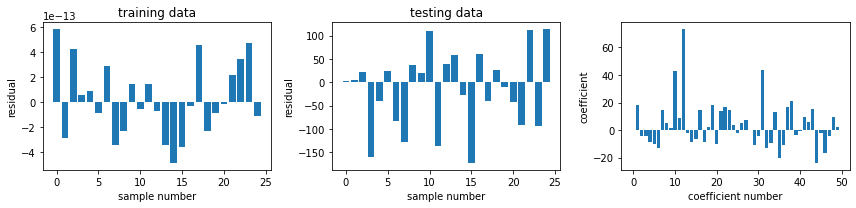

In [20]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [21]:
#모델의 과접합을 방지하기 위해 모델에 규제를 가하는 방식으로 리지 라쏘 엘라스틱 있음, 규제를 가하는 방식의 차이 

#리지 회귀분석 : 정규화 강도를 결종하는 알파값 설정가능
#                L2-Norm을 사용한 회귀, 일반적으로 영향을 거의 미치지 않는 특성에 대하여 0에 가까운 가중치를 주게 됩

model = linear_model.Ridge(alpha=2.5) #alpha=2.5)

In [22]:
model.fit(X_train, y_train)

Ridge(alpha=2.5)

In [23]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

2419.161613435685

In [24]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

167829.11511035354

In [25]:
model.score(X_train, y_train), model.score(X_test, y_test)



(0.9966624779358706, 0.6346142708290374)

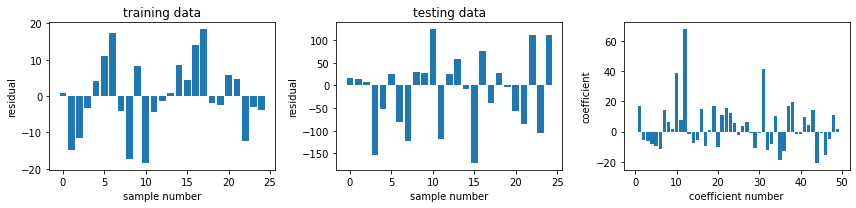

In [26]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-ridge.pdf")

In [27]:
# 라소 회귀 : L1-Norm을 사용한 회귀
#            특성값의 계수가 매우 낮다면 0으로 수렴하게 하여 특성을 지워버림

model = linear_model.Lasso(alpha=1.0)

In [28]:
model.fit(X_train, y_train)

Lasso()

In [29]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

268.3532847204599

In [30]:
# 위 두개와 비교할 때 훈련 데이터는 sse 증가, 테스트 데이터 SSE 감소

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

948.6519859216846

In [31]:
#알파값은 경험적으로 적절한 값을 설정해야함

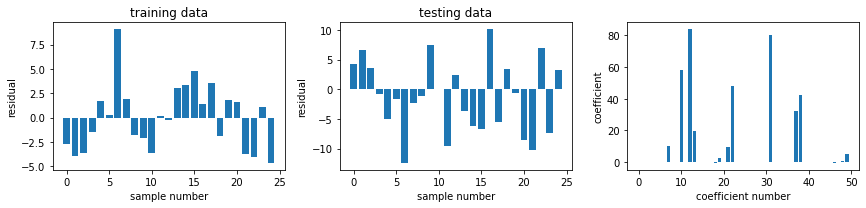

In [32]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso.pdf")

In [33]:
#알파값의 범위가 수십배씩 차이나게 설정

alphas = np.logspace(-4, 2, 100)

In [34]:
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)


#알파값을 바꿔가면 라소회귀 수행
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.806e+01, tolerance: 7.248e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.657e+01, tolerance: 7.248e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

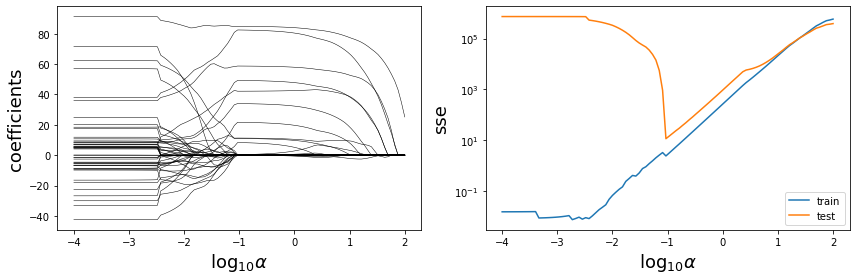

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()
fig.savefig("ch15-regression-lasso-vs-alpha.pdf")

In [36]:
# 알파값이 매우 작을때 많은 계수가 0이 아님 -> 과접합 의미
# 알파값이 특정 값 이상부터 많은 계수들이 0에 수렴

# 알파값이 증가함에 따라 훈련세트는 sse가 꾸준히 증가
# 테스트세트에서는 어느 시점에서 급격한 감소가 보임

In [37]:
# 알파값 자동 선택 라소회귀

model = linear_model.LassoCV()

In [38]:
model.fit(X_all, y_all)

LassoCV()

In [39]:
model.alpha_

0.10302720371174057

In [40]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

2.8699762679457543

In [41]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

2.2574107301791217

In [42]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9999960405253354, 0.9999950853243482)

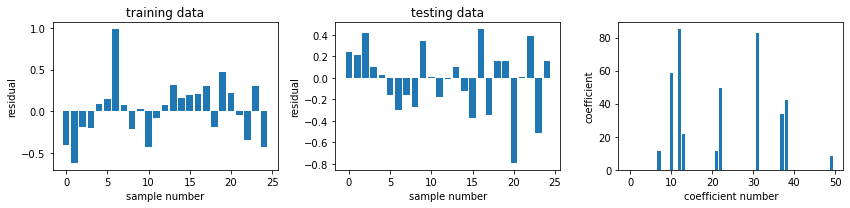

In [43]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso-cv.pdf")

In [44]:
#일레스틱넷 : 라소와 리지의 L1, L2 정규화를 결합한 다른 형태의 정규화 회귀
#             라쏘회귀와 릿지회귀의 최적화 지점이 서로 다르기 때문에 두 정규화 항을 합쳐서 r로 규제정도를 조절

#ElasticNetCV는 알파와 l1 ratio 를 명시하지 않고 자동으로 찾는 교차검증 버전임



model = linear_model.ElasticNetCV()

In [45]:
model.fit(X_all, y_all)

ElasticNetCV()

In [46]:
model.alpha_

0.2060544074234811

In [47]:
model.l1_ratio

# 0.5 라소회귀 리소회귀 두개의 특성을 모두 가지고있음

0.5

In [48]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

8066.372419683433

In [49]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

5492.101189753358

In [50]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9888714768874229, 0.9880429840997539)

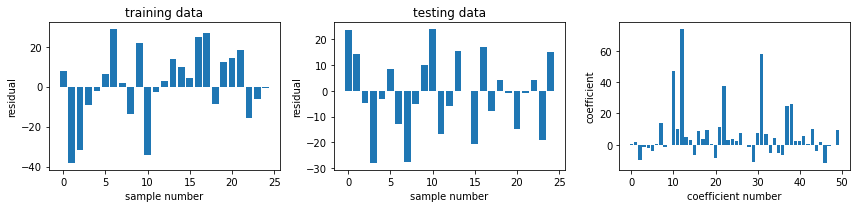

In [51]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-elastic-net-cv.pdf")

# Classification

In [52]:
iris = datasets.load_iris()

In [53]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [54]:
type(iris)

sklearn.utils._bunch.Bunch

In [55]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
iris.data.shape

(150, 4)

In [58]:
iris.target.shape

(150,)

In [59]:
# print(iris['DESCR'])

In [60]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [61]:
print(np.shape(X_train))
print(np.shape(X_test))

(105, 4)
(45, 4)


In [62]:
#로지스틱 회귀 분류
# 매개변수 C가 규제를 제어함.(기본값 1) 단, 작을수록 규제가 커진다.

classifier = linear_model.LogisticRegression()

In [63]:
classifier.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_test_pred = classifier.predict(X_test)

In [65]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [66]:
#라벨 별 갯수 카운트
np.bincount(y_test)

array([16, 16, 13], dtype=int64)

In [67]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

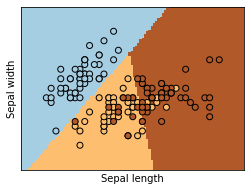

In [70]:
# import some data to play with
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [71]:
#DecisionTreeClassifier


classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

sepal length (cm) : 0.019
sepal width (cm) : 0.021
petal length (cm) : 0.374
petal width (cm) : 0.585


<AxesSubplot:>

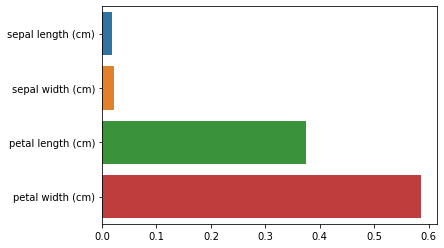

In [72]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature별 importance 매핑
for name, value in zip(iris.feature_names , classifier.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=classifier.feature_importances_ , y=iris.feature_names)

In [73]:
#KNN : 유클리드 거리를 이용해 가까운 라벨을 이용해 새로운 데이터를 예측

classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

In [74]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 11]], dtype=int64)

In [95]:
#기본 결정트리는 해당 데이터에 대해 맞춰서 분류를 진행한 것이기 때문에 과적합 현상이 자주 나타남
#이를 개선하기 위해 앙상블 기법으로 고안된 것이 랜덤 포레스트
# random_state를 고정해야 같은 결과를 볼 수 있다


classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[5, 0, 0],
       [0, 7, 0],
       [0, 0, 3]], dtype=int64)

sepal length (cm) : 0.105
sepal width (cm) : 0.033
petal length (cm) : 0.408
petal width (cm) : 0.454


<AxesSubplot:>

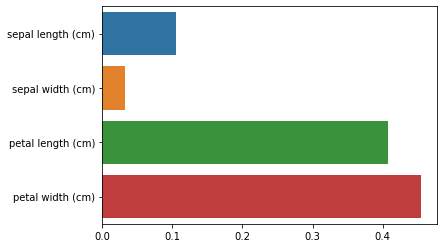

In [96]:
for name, value in zip(iris.feature_names , classifier.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=classifier.feature_importances_ , y=iris.feature_names)

In [76]:
#테스트 세트 사이즈 변경시키면서 확인

train_size_vec = np.linspace(0.1, 0.9, 30)

In [97]:
train_size_vec

array([0.1       , 0.12758621, 0.15517241, 0.18275862, 0.21034483,
       0.23793103, 0.26551724, 0.29310345, 0.32068966, 0.34827586,
       0.37586207, 0.40344828, 0.43103448, 0.45862069, 0.4862069 ,
       0.5137931 , 0.54137931, 0.56896552, 0.59655172, 0.62413793,
       0.65172414, 0.67931034, 0.70689655, 0.73448276, 0.76206897,
       0.78965517, 0.81724138, 0.84482759, 0.87241379, 0.9       ])

In [77]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [78]:
#혼돈 행렬의 대각행렬을 저장할 행렬

cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [79]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

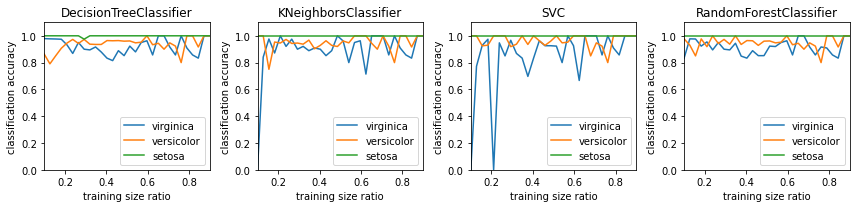

In [80]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()
fig.savefig("ch15-classification-comparison.pdf")

# Clustering : 비지도학습


In [81]:
X, y = iris.data, iris.target

In [82]:
np.random.seed(123)

In [83]:
n_clusters = 3

In [84]:
# K개의 Centroid를 기반으로 K개의 클러스터를 만들어줌

c = cluster.KMeans(n_clusters=n_clusters)

In [85]:
c.fit(X)

C:\Users\user\anaconda3\envs\ppgbio\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [86]:
y_pred = c.predict(X)

In [87]:
y_pred[::8] #8번째 요소까지만출력

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [88]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [89]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))

In [90]:
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1

In [91]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [92]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

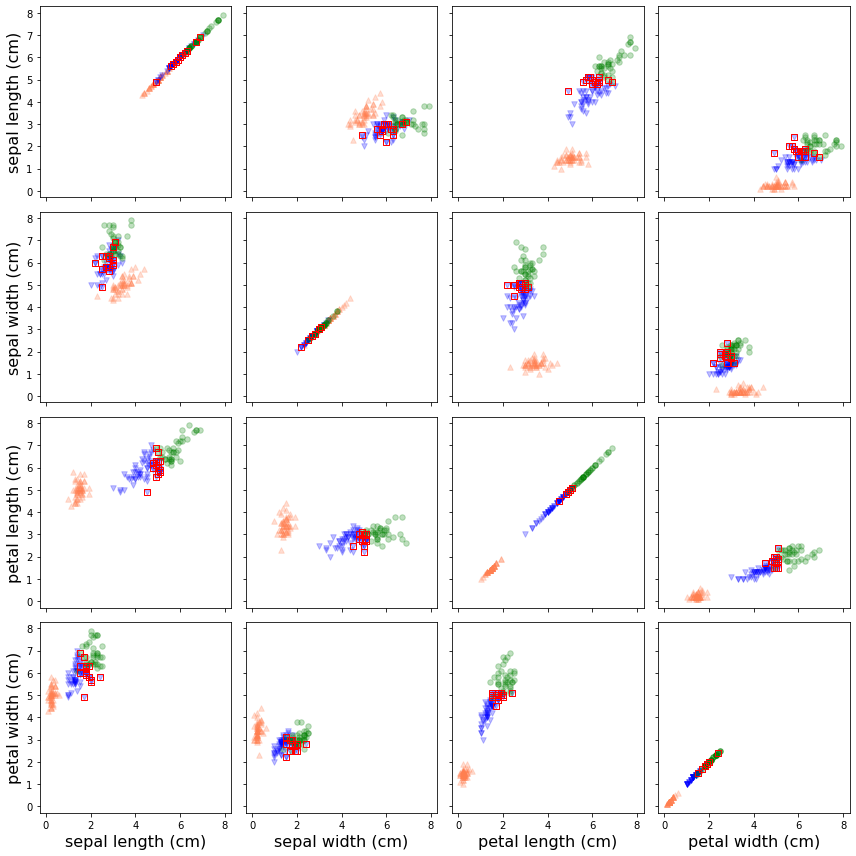

In [93]:
#일치하지 않는 각 표본 주위에 빨간 사각형

N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()
fig.savefig("ch15-clustering.pdf")

In [94]:
# https://losskatsu.github.io/machine-learning/sklearn/#